<a target="_blank" href="https://colab.research.google.com/github/gmurro/synba-adversarial-nlp/blob/master/scripts/compare-examples/human-evaluation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%%capture

%cd /content/
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !pip install pigeon-jupyter
    !git clone https://github.com/gmurro/synba-adversarial-nlp.git
    %cd synba-adversarial-nlp/scripts/compare-examples

## Human evaluation
Analysis of the adversarial samples generated in order to evaluate the *human prediction consistency*. 
A good adversary is the one for which the prediction by humans remain unchanged before and after the perturbation, like in the image below:

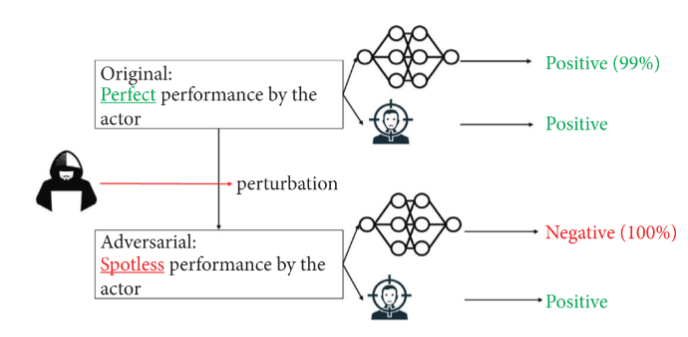

We use a python library, `pigeon` to easily annotate each adversarial sample according to the consistency percived: `CONSISTENT`, `INCONSISTENT`, `UNCLEAR`. 

**Please take into consideration ONLY consistency prediction, NOT grammatic, verb conjugation, language form or other aspects!**

In [1]:
from pigeon import annotate
import pandas as pd
from IPython.core.display import display, HTML
from functools import reduce
import os

import numpy as np

attack_methods = ['SynBA2022', 'TextFoolerJin2019', 'BAEGarg2019']

def attack_direction(attack, attack_name):
  """
  Returns the direction of the attack in HTML format, i.e. POS --> NEG or NEG --> POS
  """
  original_score = round((1-attack[f'original_score_{attack_name}'])*100,2)
  original_output = 'NEG' if attack[f'original_output_{attack_name}']==0 else 'POS'
  perturbed_score = round((attack[f'perturbed_score_{attack_name}'])*100,2)
  perturbed_output = 'NEG' if attack[f'perturbed_output_{attack_name}']==0 else 'POS'

  original_color = 'red' if original_output=='NEG' else 'green'
  perturbed_color = 'red' if perturbed_output=='NEG' else 'green'
  return f"<font color = {original_color}>{original_output} ({original_score}%)</font> --> <font color = {perturbed_color}>{perturbed_output} ({perturbed_score}%)</font>"

def visualize_attack(attack, attack_name):
  """
  Visualize the adversarial examples generated from each method in HTML format
  """
  dir = attack_direction(attack, attack_name)
  return f"{dir} </br></br> <b>Original:</b> {attack[f'original_text_{attack_name}']} </br></br> <b>SynBA:</b> {attack['perturbed_text_synba']} </br></br> <b>TextFooler:</b> {attack['perturbed_text_textfooler']} </br></br> <b>BAE:</b> {attack['perturbed_text_bae']}"

def examples_to_evaluate(dataset, num_samples=25):
  # read adversarial samples for each attack method
  attacks = [pd.read_csv(f'logs/{dataset}/log_{attack_method}_{dataset}.csv') for attack_method in attack_methods]

  # select only successful attacks
  successful_attacks = [attack[attack['result_type']=='Successful'] for attack in attacks]

  # find indices that are successful for all attack methods
  all_successful_indices = list(reduce(lambda x, y: x.intersection(y), [set(attack.index) for attack in successful_attacks]))

  # merge all successful adversarial samples into one dataframe
  attacks_to_evaluate = attacks[0].iloc[all_successful_indices].copy()

  attacks_to_evaluate.rename(columns = {'original_text':'original_text_synba',
                                        'perturbed_text':'perturbed_text_synba',
                                        'original_score':'original_score_synba',
                                        'perturbed_score':'perturbed_score_synba',
                                        'original_output':'original_output_synba',
                                        'perturbed_output':'perturbed_output_synba'}, inplace = True)
  attacks_to_evaluate['original_text_textfooler'] = attacks[1].iloc[all_successful_indices]['original_text'].copy()
  attacks_to_evaluate['perturbed_text_textfooler'] = attacks[1].iloc[all_successful_indices]['perturbed_text'].copy()
  attacks_to_evaluate['original_score_textfooler'] = attacks[1].iloc[all_successful_indices]['original_score'].copy()
  attacks_to_evaluate['perturbed_score_textfooler'] = attacks[1].iloc[all_successful_indices]['perturbed_score'].copy()
  attacks_to_evaluate['original_output_textfooler'] = attacks[1].iloc[all_successful_indices]['original_output'].copy()
  attacks_to_evaluate['perturbed_output_textfooler'] = attacks[1].iloc[all_successful_indices]['perturbed_output'].copy()
  attacks_to_evaluate['original_text_bae'] = attacks[2].iloc[all_successful_indices]['original_text'].copy()
  attacks_to_evaluate['perturbed_text_bae'] = attacks[2].iloc[all_successful_indices]['perturbed_text'].copy()
  attacks_to_evaluate['original_score_bae'] = attacks[2].iloc[all_successful_indices]['original_score'].copy()
  attacks_to_evaluate['perturbed_score_bae'] = attacks[2].iloc[all_successful_indices]['perturbed_score'].copy()
  attacks_to_evaluate['original_output_bae'] = attacks[2].iloc[all_successful_indices]['original_output'].copy()
  attacks_to_evaluate['perturbed_output_bae'] = attacks[2].iloc[all_successful_indices]['perturbed_output'].copy()

  if len(attacks_to_evaluate) > num_samples:
    return attacks_to_evaluate.sample(n = num_samples)
  else:
    return attacks_to_evaluate

C:\Users\peppe\AppData\Local\Temp\ipykernel_19428\524179265.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Evaluation on Rotten Tomatoes dataset (MR)
Let's start with the **Rotten Tomatoes** dataset. We have 25 samples for each attach method (SynBA, TextFooler, BAE), so 75 annotation to do. 
For each original example, you will see how each attack method perturbed the original sentence. But you have to annotate the consistency one attack method at a time.

In [68]:
np.random.seed(41)
rotten_tomatoes_samples = examples_to_evaluate('rotten_tomatoes', num_samples=25)

Evaluation of **SynBA** results on Rotten Tomatoes dataset. Be careful to evaluate only the row corresponding to SynBA.

In [ ]:
# convert into visualizable format
rotten_tomatoes_samples_synba = rotten_tomatoes_samples.apply(lambda x: visualize_attack(x, 'synba'), axis=1).to_numpy()

synba_rotten_tomatoes_annotations = annotate(
  rotten_tomatoes_samples_synba,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Evaluation of **TextFooler** results on Rotten Tomatoes dataset. Be careful to evaluate only the row corresponding to TextFooler.

In [ ]:
# convert into visualizable format
rotten_tomatoes_samples_textfooler = rotten_tomatoes_samples.apply(lambda x: visualize_attack(x, 'textfooler'), axis=1).to_numpy()

textfooler_rotten_tomatoes_annotations = annotate(
  rotten_tomatoes_samples_textfooler,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Evaluation of **BAE** results on Rotten Tomatoes dataset. Be careful to evaluate only the row corresponding to BAE.

In [ ]:
# convert into visualizable format
rotten_tomatoes_samples_bae = rotten_tomatoes_samples.apply(lambda x: visualize_attack(x, 'bae'), axis=1).to_numpy()

bae_rotten_tomatoes_annotations = annotate(
  rotten_tomatoes_samples_bae,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Don't forget to store your annotations in a csv file, otherwise you will lose your work!

In [60]:
# store annotation to csv
synba_rotten_tomatoes_results = pd.DataFrame(synba_rotten_tomatoes_annotations, columns =['Attack', 'SynBA_Annotation'])
textfooler_rotten_tomatoes_results = pd.DataFrame(textfooler_rotten_tomatoes_annotations, columns =['Attack', 'TextFooler_Annotation'])
bae_rotten_tomatoes_results = pd.DataFrame(bae_rotten_tomatoes_annotations, columns =['Attack', 'BAE_Annotation'])

# merge all annotations into one dataframe
rotten_tomatoes_results = pd.concat([synba_rotten_tomatoes_results['Attack'], synba_rotten_tomatoes_results['SynBA_Annotation'], textfooler_rotten_tomatoes_results['TextFooler_Annotation'], bae_rotten_tomatoes_results['BAE_Annotation']], axis=1)

if not os.path.exists('./annotations'):
    os.makedirs('./annotations')
file_name_rotten_tomatoes = os.path.join('annotations','annotations_rotten_tomatoes.csv')
rotten_tomatoes_results.to_csv(file_name_rotten_tomatoes)

### Evaluation on Amazon Polarity dataset 
Let's start with the **Amazon Polarity** dataset. We have 25 samples for each attach method (SynBA, TextFooler, BAE), so 75 annotation to do. 
For each original example, you will see how each attack method perturbed the original sentence. But you have to annotate the consistency one attack method at a time.

In [2]:
np.random.seed(41)
amazon_polarity_samples = examples_to_evaluate('amazon_polarity', num_samples=25)

Evaluation of **SynBA** results on Amazon Polarity dataset. Be careful to evaluate only the row corresponding to SynBA.

In [ ]:
# convert into visualizable format
amazon_polarity_samples_synba = amazon_polarity_samples.apply(lambda x: visualize_attack(x, 'synba'), axis=1).to_numpy()

synba_amazon_polarity_annotations = annotate(
  amazon_polarity_samples_synba,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Evaluation of **TextFooler** results on Amazon Polarity dataset. Be careful to evaluate only the row corresponding to TextFooler.

In [ ]:
# convert into visualizable format
amazon_polarity_samples_textfooler = amazon_polarity_samples.apply(lambda x: visualize_attack(x, 'textfooler'), axis=1).to_numpy()

textfooler_amazon_polarity_annotations = annotate(
  amazon_polarity_samples_textfooler,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Evaluation of **BAE** results on Amazon Polarity dataset. Be careful to evaluate only the row corresponding to BAE.

In [ ]:
# convert into visualizable format
amazon_polarity_samples_bae = amazon_polarity_samples.apply(lambda x: visualize_attack(x, 'bae'), axis=1).to_numpy()

bae_amazon_polarity_annotations = annotate(
  amazon_polarity_samples_bae,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Don't forget to store your annotations in a csv file, otherwise you will lose your work!

In [60]:
# store annotation to csv
synba_amazon_polarity_results = pd.DataFrame(synba_amazon_polarity_annotations, columns =['Attack', 'SynBA_Annotation'])
textfooler_amazon_polarity_results = pd.DataFrame(textfooler_amazon_polarity_annotations, columns =['Attack', 'TextFooler_Annotation'])
bae_amazon_polarity_results = pd.DataFrame(bae_amazon_polarity_annotations, columns =['Attack', 'BAE_Annotation'])

# merge all annotations into one dataframe
amazon_polarity_results = pd.concat([synba_amazon_polarity_results['Attack'], synba_amazon_polarity_results['SynBA_Annotation'], textfooler_amazon_polarity_results['TextFooler_Annotation'], bae_amazon_polarity_results['BAE_Annotation']], axis=1)

if not os.path.exists('./annotations'):
    os.makedirs('./annotations')
file_name_amazon_polarity = os.path.join('annotations','annotations_amazon_polarity.csv')
amazon_polarity_results.to_csv(file_name_amazon_polarity)

### Evaluation on Yelp Polarity dataset
Let's start with the **Yelp Polarity** dataset. We have 25 samples for each attach method (SynBA, TextFooler, BAE), so 75 annotation to do. 
For each original example, you will see how each attack method perturbed the original sentence. But you have to annotate the consistency one attack method at a time.

In [68]:
np.random.seed(41)
yelp_polarity_samples = examples_to_evaluate('yelp_polarity', num_samples=25)

Evaluation of **SynBA** results on Yelp Polarity dataset. Be careful to evaluate only the row corresponding to SynBA.

In [ ]:
# convert into visualizable format
yelp_polarity_samples_synba = yelp_polarity_samples.apply(lambda x: visualize_attack(x, 'synba'), axis=1).to_numpy()

synba_yelp_polarity_annotations = annotate(
  yelp_polarity_samples_synba,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Evaluation of **TextFooler** results on Yelp Polarity dataset. Be careful to evaluate only the row corresponding to TextFooler.

In [ ]:
# convert into visualizable format
yelp_polarity_samples_textfooler = yelp_polarity_samples.apply(lambda x: visualize_attack(x, 'textfooler'), axis=1).to_numpy()

textfooler_yelp_polarity_annotations = annotate(
  yelp_polarity_samples_textfooler,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Evaluation of **BAE** results on Yelp Polarity dataset. Be careful to evaluate only the row corresponding to BAE.

In [ ]:
# convert into visualizable format
yelp_polarity_samples_bae = yelp_polarity_samples.apply(lambda x: visualize_attack(x, 'bae'), axis=1).to_numpy()

bae_yelp_polarity_annotations = annotate(
  yelp_polarity_samples_bae,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Don't forget to store your annotations in a csv file, otherwise you will lose your work!

In [60]:
# store annotation to csv
synba_yelp_polarity_results = pd.DataFrame(synba_yelp_polarity_annotations, columns =['Attack', 'SynBA_Annotation'])
textfooler_yelp_polarity_results = pd.DataFrame(textfooler_yelp_polarity_annotations, columns =['Attack', 'TextFooler_Annotation'])
bae_yelp_polarity_results = pd.DataFrame(bae_yelp_polarity_annotations, columns =['Attack', 'BAE_Annotation'])

# merge all annotations into one dataframe
yelp_polarity_results = pd.concat([synba_yelp_polarity_results['Attack'], synba_yelp_polarity_results['SynBA_Annotation'], textfooler_yelp_polarity_results['TextFooler_Annotation'], bae_yelp_polarity_results['BAE_Annotation']], axis=1)

if not os.path.exists('./annotations'):
    os.makedirs('./annotations')
file_name_yelp_polarity = os.path.join('annotations','annotations_yelp_polarity.csv')
yelp_polarity_results.to_csv(file_name_yelp_polarity)

### Evaluation on IMDB dataset
Let's start with the **IMDB** dataset. We have 25 samples for each attach method (SynBA, TextFooler, BAE), so 75 annotation to do. 
For each original example, you will see how each attack method perturbed the original sentence. But you have to annotate the consistency one attack method at a time.

In [68]:
np.random.seed(41)
imdb_samples = examples_to_evaluate('imdb', num_samples=25)

Evaluation of **SynBA** results on IMDB dataset. Be careful to evaluate only the row corresponding to SynBA.

In [ ]:
# convert into visualizable format
imdb_samples_synba = imdb_samples.apply(lambda x: visualize_attack(x, 'synba'), axis=1).to_numpy()

synba_imdb_annotations = annotate(
  imdb_samples_synba,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Evaluation of **TextFooler** results on IMDB dataset. Be careful to evaluate only the row corresponding to TextFooler.

In [ ]:
# convert into visualizable format
imdb_samples_textfooler = imdb_samples.apply(lambda x: visualize_attack(x, 'textfooler'), axis=1).to_numpy()

textfooler_imdb_annotations = annotate(
  imdb_samples_textfooler,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Evaluation of **BAE** results on IMDB dataset. Be careful to evaluate only the row corresponding to BAE.

In [ ]:
# convert into visualizable format
imdb_samples_bae = imdb_samples.apply(lambda x: visualize_attack(x, 'bae'), axis=1).to_numpy()

bae_imdb_annotations = annotate(
  imdb_samples_bae,
  options=['CONSISTENT', 'INCONSISTENT', 'UNCLEAR'],
  display_fn=lambda string: display(HTML(string))
)

Don't forget to store your annotations in a csv file, otherwise you will lose your work!

In [60]:
# store annotation to csv
synba_imdb_results = pd.DataFrame(synba_imdb_annotations, columns =['Attack', 'SynBA_Annotation'])
textfooler_imdb_results = pd.DataFrame(textfooler_imdb_annotations, columns =['Attack', 'TextFooler_Annotation'])
bae_imdb_results = pd.DataFrame(bae_imdb_annotations, columns =['Attack', 'BAE_Annotation'])

# merge all annotations into one dataframe
imdb_results = pd.concat([synba_imdb_results['Attack'], synba_imdb_results['SynBA_Annotation'], textfooler_imdb_results['TextFooler_Annotation'], bae_imdb_results['BAE_Annotation']], axis=1)

if not os.path.exists('./annotations'):
    os.makedirs('./annotations')
file_name_imdb = os.path.join('annotations','annotations_imdb.csv')
imdb_results.to_csv(file_name_imdb)

Now download the csv files locally from the `annotations` folder!